In [10]:
##Parameters for Ticks in the plots
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.top'] = True

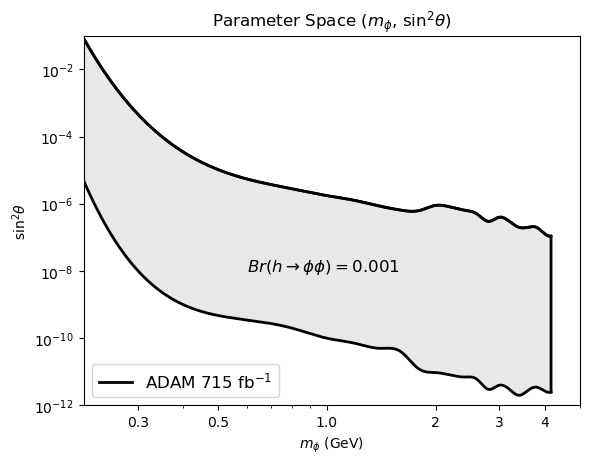

In [1]:
##Parameter Space plot, with spline interpolation for Exotic Higgs decay
##Br->10^-3
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import MultipleLocator, NullFormatter, FuncFormatter


# Data points
X = [0.212, 0.212, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8, 1.0, 1.0, 1.2, 1.2, 1.4, 1.4, 1.6, 1.6, 1.8, 1.8, 2.0, 2.0, 2.2, 2.2, 2.4, 2.4, 2.6, 2.6, 2.8, 2.8, 3.0, 3.0, 3.2, 3.2, 3.4, 3.4, 3.6, 3.6, 3.8, 3.8, 4.0, 4.0, 4.17, 4.17]
Y = [8.5*1e-2, 5*1e-6, 3.5*1e-5, 1e-9, 5.5*1e-6, 3.5*1e-10, 2.8*1e-6, 2*1e-10, 1.75*1e-6, 1e-10, 1.25*1e-6, 7*1e-11, 8.55*1e-7, 5*1e-11, 6.5*1e-7, 4*1e-11, 6.3*1e-7, 1.2*1e-11, 9*1e-7, 9.5*1e-12, 8*1e-7, 8*1e-12, 6.5*1e-7, 7*1e-12, 5*1e-7, 6*1e-12, 3*1e-7, 3*1e-12, 4*1e-7, 4*1e-12, 3*1e-7, 3*1e-12, 2*1e-7, 2*1e-12, 2*1e-7, 2.8*1e-12, 2*1e-7, 3.5*1e-12, 1.3*1e-7, 2.7*1e-12, 1.1*1e-7, 2.5*1e-12]
#Y_2 = [8.5*1e-1, 5*1e-7, 3.5*1e-4, 1e-10, 5.5*1e-5, 3.5*1e-11, 2.8*1e-5, 2*1e-11, 1.75*1e-5, 1e-11, 1.25*1e-5, 7*1e-12, 8.55*1e-6, 5*1e-12, 6.5*1e-6, 4*1e-12, 6.3*1e-6, 1.2*1e-12, 9*1e-6, 9.5*1e-13, 8*1e-6, 8*1e-13, 6.5*1e-6, 7*1e-13, 5*1e-6, 6*1e-13, 3*1e-6, 3*1e-13, 4*1e-6, 4*1e-13, 3*1e-6, 3*1e-13, 2*1e-6, 2*1e-13, 2*1e-6, 2.8*1e-13, 2*1e-6, 3.5*1e-13, 1.3*1e-6, 2.7*1e-13, 1.1*1e-6, 2.5*1e-13]

# Create a dictionary to remove duplicate X values while keeping the maximum and minimum Y values
data_dict = {}
for x, y in zip(X, Y):
    if x not in data_dict:
        data_dict[x] = [y, y]  # Initialize with y as both max and min
    else:
        data_dict[x][0] = max(y, data_dict[x][0])  # Update max y value
        data_dict[x][1] = min(y, data_dict[x][1])  # Update min y value

# Separate max and min Y values into different lists
X_unique = list(data_dict.keys())
Y_max = [data_dict[x][0] for x in X_unique]
Y_min = [data_dict[x][1] for x in X_unique]

# Calculate the logarithm of X and Y
X_log = np.log10(X_unique)
Y_max_log = np.log10(Y_max)
Y_min_log = np.log10(Y_min)

# Create a smooth spline curve through the log-transformed data for maximum Y values
spline_max = make_interp_spline(X_log, Y_max_log, k=3)
X_smooth_max = np.linspace(min(X_log), max(X_log), 1000)
Y_smooth_max = spline_max(X_smooth_max)

# Create a smooth spline curve through the log-transformed data for minimum Y values
spline_min = make_interp_spline(X_log, Y_min_log, k=3)
X_smooth_min = np.linspace(min(X_log), max(X_log), 1000)
Y_smooth_min = spline_min(X_smooth_min)

# Interpolate at the beginning points
X_smooth_max = np.insert(X_smooth_max, 0, X_smooth_min[0])
Y_smooth_max = np.insert(Y_smooth_max, 0, Y_smooth_min[0])

# Join the endpoints of the two curves
X_smooth_joined = np.concatenate((X_smooth_max, X_smooth_min[-1:]))
Y_smooth_joined = np.concatenate((Y_smooth_max, Y_smooth_min[-1:]))

# Plot the spline curves in red and green for maximum and minimum Y values
plt.loglog(10 ** X_smooth_max, 10 ** Y_smooth_max, 'black', linewidth=2)
plt.loglog(10 ** X_smooth_min, 10 ** Y_smooth_min, 'black', linewidth=2)

# Plot the joined curve in black
plt.loglog(10 ** X_smooth_joined, 10 ** Y_smooth_joined, 'black', linewidth=2, label = r'ADAM 715 fb$^{-1}$')

# Ensure both arrays have the same length
X_smooth_joined = X_smooth_joined[:len(Y_smooth_joined)]
Y_smooth_min = Y_smooth_min[:len(X_smooth_joined)]

# Interpolate Y_smooth_min to match the length of X_smooth_joined
interp_func = interp1d(np.arange(len(Y_smooth_min)), Y_smooth_min)
Y_smooth_min_interpolated = interp_func(np.linspace(0, len(Y_smooth_min) - 1, len(X_smooth_joined)))

# Fill the area under the curve with a light gray color
plt.fill_between(10 ** X_smooth_joined, 10 ** Y_smooth_min_interpolated, 10 ** Y_smooth_joined, color='lightgray', alpha=0.5)

# Ticks for X-axis
major_x_ticks = [0.3, 0.5, 1.0, 2, 3, 4]

# Set the X-axis major ticks and labels
plt.xticks(major_x_ticks, [f'{tick}' for tick in major_x_ticks])

# Function to format Y-axis tick labels as 10^-X
def format_y_tick(value, _):
    if value == 1e-2:
        return r'$10^{-2}$'
    elif value == 1e-4:
        return r'$10^{-4}$'
    elif value == 1e-6:
        return r'$10^{-6}$'
    elif value == 1e-8:
        return r'$10^{-8}$'
    elif value == 1e-10:
        return r'$10^{-10}$'
    elif value == 1e-12:
        return r'$10^{-12}$'
    else:
        return ''

# Ticks for Y-axis
major_ticks = [1e-12, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2]

# Set the Y-axis major ticks and labels
plt.yticks(major_ticks, [f'{tick:.0e}' for tick in major_ticks])
plt.yticks(major_ticks)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))

# Set the X-axis limits
plt.xlim(0.212, 5.0)  # Set the limits to start from 0.212 and end at 4.17

# Set Y-axis limits to ensure it ends at 10^-3
plt.ylim(1e-12, 1e-1)

# Add label "h->phiphi" on the curve
plt.text(0.6, 1e-8, r'$Br(h\rightarrow \phi\phi)=0.001$', fontsize=12, color='black')

# Set labels and title
plt.xlabel(r'$m_{\phi}$ (GeV)')
plt.ylabel(r'$\sin^2\theta$')
plt.title('Parameter Space ($m_{\phi}$, $\sin^2\\theta$)')

# Show grid
plt.grid(False)

# Show the legend
plt.legend(loc='lower left', fontsize=12)




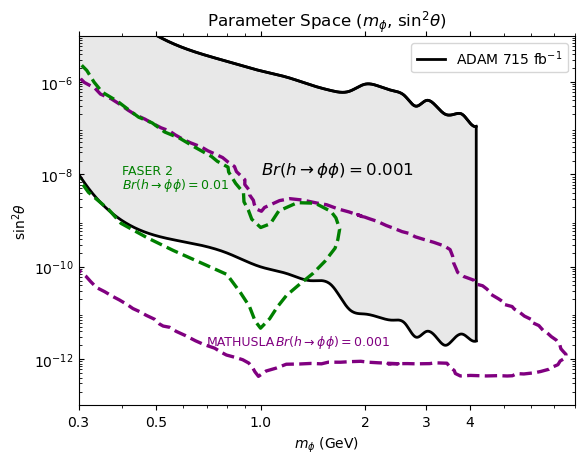

In [5]:
## Comparison of ADAM parameter space with FASER and MATHUSLA
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import MultipleLocator, NullFormatter, FuncFormatter


# Data points
X = [0.212, 0.212, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8, 1.0, 1.0, 1.2, 1.2, 1.4, 1.4, 1.6, 1.6, 1.8, 1.8, 2.0, 2.0, 2.2, 2.2, 2.4, 2.4, 2.6, 2.6, 2.8, 2.8, 3.0, 3.0, 3.2, 3.2, 3.4, 3.4, 3.6, 3.6, 3.8, 3.8, 4.0, 4.0, 4.17, 4.17]
Y = [8.5*1e-2, 5*1e-6, 3.5*1e-5, 1e-9, 5.5*1e-6, 3.5*1e-10, 2.8*1e-6, 2*1e-10, 1.75*1e-6, 1e-10, 1.25*1e-6, 7*1e-11, 8.55*1e-7, 5*1e-11, 6.5*1e-7, 4*1e-11, 6.3*1e-7, 1.2*1e-11, 9*1e-7, 9.5*1e-12, 8*1e-7, 8*1e-12, 6.5*1e-7, 7*1e-12, 5*1e-7, 6*1e-12, 3*1e-7, 3*1e-12, 4*1e-7, 4*1e-12, 3*1e-7, 3*1e-12, 2*1e-7, 2*1e-12, 2*1e-7, 2.8*1e-12, 2*1e-7, 3.5*1e-12, 1.3*1e-7, 2.7*1e-12, 1.1*1e-7, 2.5*1e-12]
#Y_2 = [8.5*1e-1, 5*1e-7, 3.5*1e-4, 1e-10, 5.5*1e-5, 3.5*1e-11, 2.8*1e-5, 2*1e-11, 1.75*1e-5, 1e-11, 1.25*1e-5, 7*1e-12, 8.55*1e-6, 5*1e-12, 6.5*1e-6, 4*1e-12, 6.3*1e-6, 1.2*1e-12, 9*1e-6, 9.5*1e-13, 8*1e-6, 8*1e-13, 6.5*1e-6, 7*1e-13, 5*1e-6, 6*1e-13, 3*1e-6, 3*1e-13, 4*1e-6, 4*1e-13, 3*1e-6, 3*1e-13, 2*1e-6, 2*1e-13, 2*1e-6, 2.8*1e-13, 2*1e-6, 3.5*1e-13, 1.3*1e-6, 2.7*1e-13, 1.1*1e-6, 2.5*1e-13]

# Create a dictionary to remove duplicate X values while keeping the maximum and minimum Y values
data_dict = {}
for x, y in zip(X, Y):
    if x not in data_dict:
        data_dict[x] = [y, y]  # Initialize with y as both max and min
    else:
        data_dict[x][0] = max(y, data_dict[x][0])  # Update max y value
        data_dict[x][1] = min(y, data_dict[x][1])  # Update min y value

# Separate max and min Y values into different lists
X_unique = list(data_dict.keys())
Y_max = [data_dict[x][0] for x in X_unique]
Y_min = [data_dict[x][1] for x in X_unique]

# Calculate the logarithm of X and Y
X_log = np.log10(X_unique)
Y_max_log = np.log10(Y_max)
Y_min_log = np.log10(Y_min)

# Create a smooth spline curve through the log-transformed data for maximum Y values
spline_max = make_interp_spline(X_log, Y_max_log, k=3)
X_smooth_max = np.linspace(min(X_log), max(X_log), 1000)
Y_smooth_max = spline_max(X_smooth_max)

# Create a smooth spline curve through the log-transformed data for minimum Y values
spline_min = make_interp_spline(X_log, Y_min_log, k=3)
X_smooth_min = np.linspace(min(X_log), max(X_log), 1000)
Y_smooth_min = spline_min(X_smooth_min)

# Interpolate at the beginning points
X_smooth_max = np.insert(X_smooth_max, 0, X_smooth_min[0])
Y_smooth_max = np.insert(Y_smooth_max, 0, Y_smooth_min[0])

# Join the endpoints of the two curves
X_smooth_joined = np.concatenate((X_smooth_max, X_smooth_min[-1:]))
Y_smooth_joined = np.concatenate((Y_smooth_max, Y_smooth_min[-1:]))

# Plot the spline curves in red and green for maximum and minimum Y values
plt.loglog(10 ** X_smooth_max, 10 ** Y_smooth_max, 'black', linewidth=2)
plt.loglog(10 ** X_smooth_min, 10 ** Y_smooth_min, 'black', linewidth=2)

# Plot the joined curve in black
plt.loglog(10 ** X_smooth_joined, 10 ** Y_smooth_joined, 'black', linewidth=2, label = r'ADAM 715 fb$^{-1}$')

# Ensure both arrays have the same length
X_smooth_joined = X_smooth_joined[:len(Y_smooth_joined)]
Y_smooth_min = Y_smooth_min[:len(X_smooth_joined)]

# Interpolate Y_smooth_min to match the length of X_smooth_joined
interp_func = interp1d(np.arange(len(Y_smooth_min)), Y_smooth_min)
Y_smooth_min_interpolated = interp_func(np.linspace(0, len(Y_smooth_min) - 1, len(X_smooth_joined)))

# Fill the area under the curve with a light gray color
plt.fill_between(10 ** X_smooth_joined, 10 ** Y_smooth_min_interpolated, 10 ** Y_smooth_joined, color='lightgray', alpha=0.5)

#MATHUSLA's plot
plt.loglog(X1, X2, linestyle='--', color = 'Purple', linewidth = 2.4)

#Faser's plot
plt.loglog(Z1, Z2, linestyle='--', color = 'green', linewidth = 2.4)

# Ticks for X-axis
major_x_ticks = [0.3, 0.5, 1.0, 2, 3, 4]

# Set the X-axis major ticks and labels
plt.xticks(major_x_ticks, [f'{tick}' for tick in major_x_ticks])

# Function to format Y-axis tick labels as 10^-X
def format_y_tick(value, _):
    if value == 1e-2:
        return r'$10^{-2}$'
    elif value == 1e-4:
        return r'$10^{-4}$'
    elif value == 1e-6:
        return r'$10^{-6}$'
    elif value == 1e-8:
        return r'$10^{-8}$'
    elif value == 1e-10:
        return r'$10^{-10}$'
    elif value == 1e-12:
        return r'$10^{-12}$'
    else:
        return ''

# Ticks for Y-axis
major_ticks = [1e-12, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2]

# Set the Y-axis major ticks and labels
plt.yticks(major_ticks, [f'{tick:.0e}' for tick in major_ticks])
plt.yticks(major_ticks)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))

# Set the X-axis limits
plt.xlim(0.3, 8.0)  # Set the limits to start from 0.212 and end at 4.17

# Set Y-axis limits to ensure it ends at 10^-3
plt.ylim(1e-13, 1e-5)

# Add label "h->phiphi" on the curve
plt.text(1, 1e-8, r'$Br(h\rightarrow \phi\phi)=0.001$', fontsize=12, color='black')
plt.text(0.4, 0.51e-8, r'$Br(h\rightarrow \phi\phi)=0.01$', fontsize=9, color='green')
plt.text(0.4, 1e-8, r'FASER 2', fontsize=9, color='green')
plt.text(1.1, 0.2e-11, r'$Br(h\rightarrow \phi\phi)=0.001$', fontsize=9, color='purple')
plt.text(0.7, 0.2e-11, r'MATHUSLA', fontsize=9, color='purple')


# Set labels and title
plt.xlabel(r'$m_{\phi}$ (GeV)')
plt.ylabel(r'$\sin^2\theta$')
plt.title('Parameter Space ($m_{\phi}$, $\sin^2\\theta$)')

# Show grid
plt.grid(False)

# Show the legend
plt.legend(loc='upper right', fontsize=10)




In [3]:
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.top'] = True

In [6]:
## File Path for MATHUSLA and FASER
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Import Pandas
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import LogLocator, ScalarFormatter

#file path (Mathusla)
file_path_0 = "/Users/rishaplamichhane/Documents/Research Materials/Mathusla_Exotic_Higgs.xls"
file_path_1 = "/Users/rishaplamichhane/Documents/Research Materials/Faser_exotic_higgs.xls"


# Read data from XLS file
data1 = pd.read_excel(file_path_0)  
data2 = pd.read_excel(file_path_1) 

# Extract 'x' and 'y' columns from the data 
X1 = data1['x']
X2 = data1['z']

# Extract 'x' and 'y' columns from the data 
Z1 = data2['x']
Z2 = data2['z']




In [7]:
#Both parameter space, Dark Higgs prodduction from Exotic Higgs and B decays

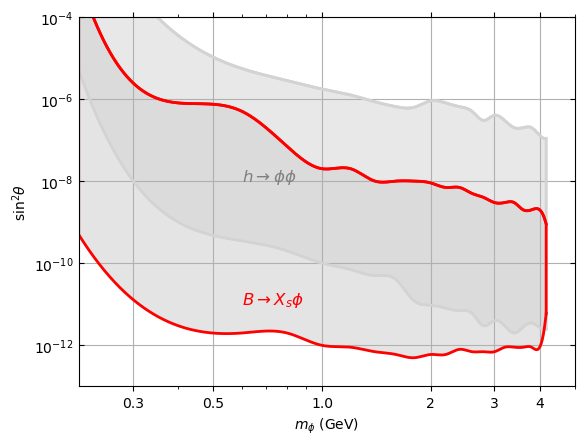

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import MultipleLocator, NullFormatter, FuncFormatter


# Data points
X = [0.212, 0.212, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8, 1.0, 1.0, 1.2, 1.2, 1.4, 1.4, 1.6, 1.6, 1.8, 1.8, 2.0, 2.0, 2.2, 2.2, 2.4, 2.4, 2.6, 2.6, 2.8, 2.8, 3.0, 3.0, 3.2, 3.2, 3.4, 3.4, 3.6, 3.6, 3.8, 3.8, 4.0, 4.0, 4.17, 4.17]
Y = [8.5*1e-2, 5*1e-6, 3.5*1e-5, 1e-9, 5.5*1e-6, 3.5*1e-10, 2.8*1e-6, 2*1e-10, 1.75*1e-6, 1e-10, 1.25*1e-6, 7*1e-11, 8.55*1e-7, 5*1e-11, 6.5*1e-7, 4*1e-11, 6.3*1e-7, 1.2*1e-11, 9*1e-7, 9.5*1e-12, 8*1e-7, 8*1e-12, 6.5*1e-7, 7*1e-12, 5*1e-7, 6*1e-12, 3*1e-7, 3*1e-12, 4*1e-7, 4*1e-12, 3*1e-7, 3*1e-12, 2*1e-7, 2*1e-12, 2*1e-7, 2.8*1e-12, 2*1e-7, 3.5*1e-12, 1.3*1e-7, 2.7*1e-12, 1.1*1e-7, 2.5*1e-12]
#Y_2 = [8.5*1e-1, 5*1e-7, 3.5*1e-4, 1e-10, 5.5*1e-5, 3.5*1e-11, 2.8*1e-5, 2*1e-11, 1.75*1e-5, 1e-11, 1.25*1e-5, 7*1e-12, 8.55*1e-6, 5*1e-12, 6.5*1e-6, 4*1e-12, 6.3*1e-6, 1.2*1e-12, 9*1e-6, 9.5*1e-13, 8*1e-6, 8*1e-13, 6.5*1e-6, 7*1e-13, 5*1e-6, 6*1e-13, 3*1e-6, 3*1e-13, 4*1e-6, 4*1e-13, 3*1e-6, 3*1e-13, 2*1e-6, 2*1e-13, 2*1e-6, 2.8*1e-13, 2*1e-6, 3.5*1e-13, 1.3*1e-6, 2.7*1e-13, 1.1*1e-6, 2.5*1e-13]

# Create a dictionary to remove duplicate X values while keeping the maximum and minimum Y values
data_dict = {}
for x, y in zip(X, Y):
    if x not in data_dict:
        data_dict[x] = [y, y]  # Initialize with y as both max and min
    else:
        data_dict[x][0] = max(y, data_dict[x][0])  # Update max y value
        data_dict[x][1] = min(y, data_dict[x][1])  # Update min y value

# Separate max and min Y values into different lists
X_unique = list(data_dict.keys())
Y_max = [data_dict[x][0] for x in X_unique]
Y_min = [data_dict[x][1] for x in X_unique]

# Calculate the logarithm of X and Y
X_log = np.log10(X_unique)
Y_max_log = np.log10(Y_max)
Y_min_log = np.log10(Y_min)

# Create a smooth spline curve through the log-transformed data for maximum Y values
spline_max = make_interp_spline(X_log, Y_max_log, k=3)
X_smooth_max = np.linspace(min(X_log), max(X_log), 1000)
Y_smooth_max = spline_max(X_smooth_max)

# Create a smooth spline curve through the log-transformed data for minimum Y values
spline_min = make_interp_spline(X_log, Y_min_log, k=3)
X_smooth_min = np.linspace(min(X_log), max(X_log), 1000)
Y_smooth_min = spline_min(X_smooth_min)

# Interpolate at the beginning points
X_smooth_max = np.insert(X_smooth_max, 0, X_smooth_min[0])
Y_smooth_max = np.insert(Y_smooth_max, 0, Y_smooth_min[0])

# Join the endpoints of the two curves
X_smooth_joined = np.concatenate((X_smooth_max, X_smooth_min[-1:]))
Y_smooth_joined = np.concatenate((Y_smooth_max, Y_smooth_min[-1:]))

# Plot the spline curves in red and green for maximum and minimum Y values
plt.loglog(10 ** X_smooth_max, 10 ** Y_smooth_max, 'lightgray', linewidth=2)
plt.loglog(10 ** X_smooth_min, 10 ** Y_smooth_min, 'lightgray', linewidth=2)

# Plot the joined curve in black
plt.loglog(10 ** X_smooth_joined, 10 ** Y_smooth_joined, 'lightgray', linewidth=2, label = r'ADAM 715 fb$^{-1}$')

# Ensure both arrays have the same length
X_smooth_joined = X_smooth_joined[:len(Y_smooth_joined)]
Y_smooth_min = Y_smooth_min[:len(X_smooth_joined)]

# Interpolate Y_smooth_min to match the length of X_smooth_joined
interp_func = interp1d(np.arange(len(Y_smooth_min)), Y_smooth_min)
Y_smooth_min_interpolated = interp_func(np.linspace(0, len(Y_smooth_min) - 1, len(X_smooth_joined)))

# Fill the area under the curve with a light gray color
plt.fill_between(10 ** X_smooth_joined, 10 ** Y_smooth_min_interpolated, 10 ** Y_smooth_joined, color='lightgray', alpha=0.5)

#B decays
# Data points
X = [0.212, 0.212, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8, 1.0, 1.0, 1.2, 1.2, 1.4, 1.4, 1.6, 1.6, 1.8, 1.8, 2.0, 2.0, 2.2, 2.2, 2.4, 2.4, 2.6, 2.6, 2.8, 2.8, 3.0, 3.0, 3.2, 3.2, 3.4, 3.4, 3.6, 3.6, 3.8, 3.8, 4.0, 4.0, 4.17, 4.17]
Y_2 = [1e-3, 5e-10, 8e-7, 3e-12, 5e-7, 2e-12, 7e-8, 2e-12, 2e-8, 1e-12, 2e-8, 9e-13, 1e-8, 7e-13, 1e-8, 6e-13, 1e-8, 5e-13, 9e-9, 6e-13, 7e-9, 6e-13, 7e-9, 8e-13, 5e-9, 7e-13, 4e-9, 7e-13, 3e-9, 7e-13, 3e-9, 9e-13, 3e-9, 9e-13, 2e-9, 9e-13, 2e-9, 9e-13, 2e-9, 9e-13, 9e-10, 6e-12]

# Create a dictionary to remove duplicate X values while keeping the maximum and minimum Y values
data_dict = {}
for x, y in zip(X, Y_2):
    if x not in data_dict:
        data_dict[x] = [y, y]  # Initialize with y as both max and min
    else:
        data_dict[x][0] = max(y, data_dict[x][0])  # Update max y value
        data_dict[x][1] = min(y, data_dict[x][1])  # Update min y value

# Separate max and min Y values into different lists
X_unique = list(data_dict.keys())
Y_max = [data_dict[x][0] for x in X_unique]
Y_min = [data_dict[x][1] for x in X_unique]

# Calculate the logarithm of X and Y
X_log = np.log10(X_unique)
Y_max_log = np.log10(Y_max)
Y_min_log = np.log10(Y_min)

# Create a smooth spline curve through the log-transformed data for maximum Y values
spline_max = make_interp_spline(X_log, Y_max_log, k=3)
X_smooth_max = np.linspace(min(X_log), max(X_log), 1000)
Y_smooth_max = spline_max(X_smooth_max)

# Create a smooth spline curve through the log-transformed data for minimum Y values
spline_min = make_interp_spline(X_log, Y_min_log, k=3)
X_smooth_min = np.linspace(min(X_log), max(X_log), 1000)
Y_smooth_min = spline_min(X_smooth_min)

# Interpolate at the beginning points
X_smooth_max = np.insert(X_smooth_max, 0, X_smooth_min[0])
Y_smooth_max = np.insert(Y_smooth_max, 0, Y_smooth_min[0])

# Join the endpoints of the two curves
X_smooth_joined = np.concatenate((X_smooth_max, X_smooth_min[-1:]))
Y_smooth_joined = np.concatenate((Y_smooth_max, Y_smooth_min[-1:]))

# Plot the spline curves in red and green for maximum and minimum Y values
plt.loglog(10 ** X_smooth_max, 10 ** Y_smooth_max, 'r-', linewidth=2)
plt.loglog(10 ** X_smooth_min, 10 ** Y_smooth_min, 'r-', linewidth=2)

# Plot the joined curve in black
plt.loglog(10 ** X_smooth_joined, 10 ** Y_smooth_joined, 'r-', linewidth=2, label = r'ADAM 715 fb$^{-1}$')

# Ensure both arrays have the same length
X_smooth_joined = X_smooth_joined[:len(Y_smooth_joined)]
Y_smooth_min = Y_smooth_min[:len(X_smooth_joined)]

# Interpolate Y_smooth_min to match the length of X_smooth_joined
interp_func = interp1d(np.arange(len(Y_smooth_min)), Y_smooth_min)
Y_smooth_min_interpolated = interp_func(np.linspace(0, len(Y_smooth_min) - 1, len(X_smooth_joined)))

# Fill the area under the curve with a light gray color
plt.fill_between(10 ** X_smooth_joined, 10 ** Y_smooth_min_interpolated, 10 ** Y_smooth_joined, color='lightgray', alpha=0.6)

# Ticks for X-axis
major_x_ticks = [0.3, 0.5, 1.0, 2, 3, 4]

# Set the X-axis major ticks and labels
plt.xticks(major_x_ticks, [f'{tick}' for tick in major_x_ticks])

# Function to format Y-axis tick labels as 10^-X
def format_y_tick(value, _):
    if value == 1e-2:
        return r'$10^{-2}$'
    elif value == 1e-4:
        return r'$10^{-4}$'
    elif value == 1e-6:
        return r'$10^{-6}$'
    elif value == 1e-8:
        return r'$10^{-8}$'
    elif value == 1e-10:
        return r'$10^{-10}$'
    elif value == 1e-12:
        return r'$10^{-12}$'
    else:
        return ''

# Ticks for Y-axis
major_ticks = [1e-12, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2]

# Set the Y-axis major ticks and labels
plt.yticks(major_ticks, [f'{tick:.0e}' for tick in major_ticks])
plt.yticks(major_ticks)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))

# Set the X-axis limits
plt.xlim(0.212, 5.0)  # Set the limits to start from 0.212 and end at 4.17

# Set Y-axis limits to ensure it ends at 10^-3
plt.ylim(1e-13, 1e-4)

# Add label "h->phiphi" on the curve
plt.text(0.6, 1e-8, r'$h\rightarrow \phi\phi$', fontsize=12, color='gray')

# Add label "B->X_sphi" on the curve
plt.text(0.6, 1e-11, r'$B\rightarrow X_s\phi$', fontsize=12, color='red')


# Set labels and title
plt.xlabel(r'$m_{\phi}$ (GeV)')
plt.ylabel(r'$\sin^2\theta$')
#plt.title('Parameter Space Coverage')

# Show grid
plt.grid(True)

# Show the legend
#plt.legend(loc='lower left', fontsize=12)




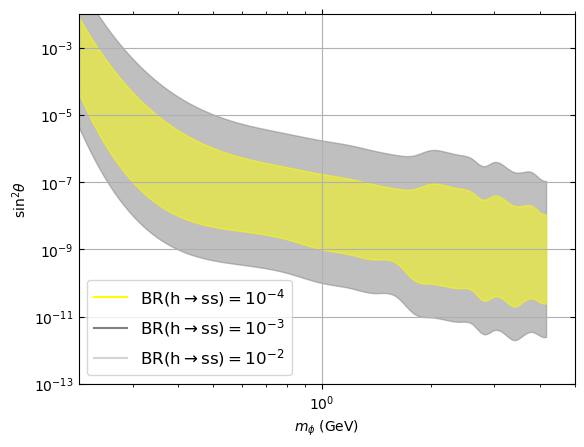

In [9]:
## Scaling of Darkk Higgs parameter space for various branching ratios
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from scipy.interpolate import interp1d
from matplotlib.ticker import MultipleLocator, NullFormatter, FuncFormatter


# Data points
X = [0.212, 0.212, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8, 1.0, 1.0, 1.2, 1.2, 1.4, 1.4, 1.6, 1.6, 1.8, 1.8, 2.0, 2.0, 2.2, 2.2, 2.4, 2.4, 2.6, 2.6, 2.8, 2.8, 3.0, 3.0, 3.2, 3.2, 3.4, 3.4, 3.6, 3.6, 3.8, 3.8, 4.0, 4.0, 4.17, 4.17]
#Br-> 0.0001
Y_3= [8.5*1e-3, 5*1e-5, 3.5*1e-6, 1e-8, 5.5*1e-7, 3.5*1e-9, 2.8*1e-7, 2*1e-9, 1.75*1e-7, 1e-9, 1.25*1e-7, 7*1e-10, 8.55*1e-8, 5*1e-10, 6.5*1e-8, 4*1e-10, 6.3*1e-8, 1.2*1e-10, 9*1e-8, 9.5*1e-11, 8*1e-8, 8*1e-11, 6.5*1e-8, 7*1e-11, 5*1e-8, 6*1e-11, 3*1e-8, 3*1e-11, 4*1e-8, 4*1e-11, 3*1e-8, 3*1e-11, 2*1e-8, 2*1e-11, 2*1e-8, 2.8*1e-11, 2*1e-8, 3.5*1e-11, 1.3*1e-8, 2.7*1e-11, 1.1*1e-8, 2.5*1e-11]
#Br-> 0.001
Y = [8.5*1e-2, 5*1e-6, 3.5*1e-5, 1e-9, 5.5*1e-6, 3.5*1e-10, 2.8*1e-6, 2*1e-10, 1.75*1e-6, 1e-10, 1.25*1e-6, 7*1e-11, 8.55*1e-7, 5*1e-11, 6.5*1e-7, 4*1e-11, 6.3*1e-7, 1.2*1e-11, 9*1e-7, 9.5*1e-12, 8*1e-7, 8*1e-12, 6.5*1e-7, 7*1e-12, 5*1e-7, 6*1e-12, 3*1e-7, 3*1e-12, 4*1e-7, 4*1e-12, 3*1e-7, 3*1e-12, 2*1e-7, 2*1e-12, 2*1e-7, 2.8*1e-12, 2*1e-7, 3.5*1e-12, 1.3*1e-7, 2.7*1e-12, 1.1*1e-7, 2.5*1e-12]
#Br->0.01
Y_2 = [8.5*1e-1, 5*1e-7, 3.5*1e-4, 1e-10, 5.5*1e-5, 3.5*1e-11, 2.8*1e-5, 2*1e-11, 1.75*1e-5, 1e-11, 1.25*1e-5, 7*1e-12, 8.55*1e-6, 5*1e-12, 6.5*1e-6, 4*1e-12, 6.3*1e-6, 1.2*1e-12, 9*1e-6, 9.5*1e-13, 8*1e-6, 8*1e-13, 6.5*1e-6, 7*1e-13, 5*1e-6, 6*1e-13, 3*1e-6, 3*1e-13, 4*1e-6, 4*1e-13, 3*1e-6, 3*1e-13, 2*1e-6, 2*1e-13, 2*1e-6, 2.8*1e-13, 2*1e-6, 3.5*1e-13, 1.3*1e-6, 2.7*1e-13, 1.1*1e-6, 2.5*1e-13]


#1st figure for Br->0.001
# Create a dictionary to remove duplicate X values while keeping the maximum and minimum Y values
data_dict = {}
for x, y in zip(X, Y):
    if x not in data_dict:
        data_dict[x] = [y, y]  # Initialize with y as both max and min
    else:
        data_dict[x][0] = max(y, data_dict[x][0])  # Update max y value
        data_dict[x][1] = min(y, data_dict[x][1])  # Update min y value

# Separate max and min Y values into different lists
X_unique = list(data_dict.keys())
Y_max = [data_dict[x][0] for x in X_unique]
Y_min = [data_dict[x][1] for x in X_unique]

# Calculate the logarithm of X and Y
X_log = np.log10(X_unique)
Y_max_log = np.log10(Y_max)
Y_min_log = np.log10(Y_min)

# Create a smooth spline curve through the log-transformed data for maximum Y values
spline_max = make_interp_spline(X_log, Y_max_log, k=3)
X_smooth_max = np.linspace(min(X_log), max(X_log), 1000)
Y_smooth_max = spline_max(X_smooth_max)

# Create a smooth spline curve through the log-transformed data for minimum Y values
spline_min = make_interp_spline(X_log, Y_min_log, k=3)
X_smooth_min = np.linspace(min(X_log), max(X_log), 1000)
Y_smooth_min = spline_min(X_smooth_min)

# Interpolate at the beginning points
X_smooth_max = np.insert(X_smooth_max, 0, X_smooth_min[0])
Y_smooth_max = np.insert(Y_smooth_max, 0, Y_smooth_min[0])

# Join the endpoints of the two curves
X_smooth_joined = np.concatenate((X_smooth_max, X_smooth_min[-1:]))
Y_smooth_joined = np.concatenate((Y_smooth_max, Y_smooth_min[-1:]))

# Plot the spline curves in red and green for maximum and minimum Y values
#plt.loglog(10 ** X_smooth_max, 10 ** Y_smooth_max, 'gray', linewidth=2)
#plt.loglog(10 ** X_smooth_min, 10 ** Y_smooth_min, 'gray', linewidth=2)

# Plot the joined curve in black
#plt.loglog(10 ** X_smooth_joined, 10 ** Y_smooth_joined, 'gray', linewidth=2, label = r'ADAM 715 fb$^{-1}$')

# Ensure both arrays have the same length
X_smooth_joined = X_smooth_joined[:len(Y_smooth_joined)]
Y_smooth_min = Y_smooth_min[:len(X_smooth_joined)]

# Interpolate Y_smooth_min to match the length of X_smooth_joined
interp_func = interp1d(np.arange(len(Y_smooth_min)), Y_smooth_min)
Y_smooth_min_interpolated = interp_func(np.linspace(0, len(Y_smooth_min) - 1, len(X_smooth_joined)))

# Fill the area under the curve with a light gray color
plt.fill_between(10 ** X_smooth_joined, 10 ** Y_smooth_min_interpolated, 10 ** Y_smooth_joined, color='gray', alpha=0.5)



#3rd figure
# Create a dictionary to remove duplicate X values while keeping the maximum and minimum Y values
data_dict = {}
for x, y in zip(X, Y_3):
    if x not in data_dict:
        data_dict[x] = [y, y]  # Initialize with y as both max and min
    else:
        data_dict[x][0] = max(y, data_dict[x][0])  # Update max y value
        data_dict[x][1] = min(y, data_dict[x][1])  # Update min y value

# Separate max and min Y values into different lists
X_unique = list(data_dict.keys())
Y_max = [data_dict[x][0] for x in X_unique]
Y_min = [data_dict[x][1] for x in X_unique]

# Calculate the logarithm of X and Y
X_log = np.log10(X_unique)
Y_max_log = np.log10(Y_max)
Y_min_log = np.log10(Y_min)

# Create a smooth spline curve through the log-transformed data for maximum Y values
spline_max = make_interp_spline(X_log, Y_max_log, k=3)
X_smooth_max = np.linspace(min(X_log), max(X_log), 1000)
Y_smooth_max = spline_max(X_smooth_max)

# Create a smooth spline curve through the log-transformed data for minimum Y values
spline_min = make_interp_spline(X_log, Y_min_log, k=3)
X_smooth_min = np.linspace(min(X_log), max(X_log), 1000)
Y_smooth_min = spline_min(X_smooth_min)

# Interpolate at the beginning points
X_smooth_max = np.insert(X_smooth_max, 0, X_smooth_min[0])
Y_smooth_max = np.insert(Y_smooth_max, 0, Y_smooth_min[0])

# Join the endpoints of the two curves
X_smooth_joined = np.concatenate((X_smooth_max, X_smooth_min[-1:]))
Y_smooth_joined = np.concatenate((Y_smooth_max, Y_smooth_min[-1:]))

# Plot the spline curves in red and green for maximum and minimum Y values
#plt.loglog(10 ** X_smooth_max, 10 ** Y_smooth_max, 'lightgray', linewidth=2)
#plt.loglog(10 ** X_smooth_min, 10 ** Y_smooth_min, 'lightgray', linewidth=2)

# Plot the joined curve in black
#plt.loglog(10 ** X_smooth_joined, 10 ** Y_smooth_joined, 'lightgray', linewidth=2, label = r'ADAM 715 fb$^{-1}$')

# Ensure both arrays have the same length
X_smooth_joined = X_smooth_joined[:len(Y_smooth_joined)]
Y_smooth_min = Y_smooth_min[:len(X_smooth_joined)]

# Interpolate Y_smooth_min to match the length of X_smooth_joined
interp_func = interp1d(np.arange(len(Y_smooth_min)), Y_smooth_min)
Y_smooth_min_interpolated = interp_func(np.linspace(0, len(Y_smooth_min) - 1, len(X_smooth_joined)))

# Fill the area under the curve with a light gray color
plt.fill_between(10 ** X_smooth_joined, 10 ** Y_smooth_min_interpolated, 10 ** Y_smooth_joined, color='yellow', alpha=0.5)

# Ticks for X-axis
major_x_ticks = [0.3, 0.5, 1.0, 2, 3, 4]

# Set the X-axis major ticks and labels
plt.gca().set_xticks([0.3, 0.5, 1.0, 2, 3, 4])
plt.gca().set_xticklabels(['0.3', '0.5', '1.0', '2', '3', '4'])


# Function to format Y-axis tick labels as 10^-X
def format_y_tick(value, _):
    if value == 1e-2:
        return r'$10^{-2}$'
    elif value == 1e-4:
        return r'$10^{-4}$'
    elif value == 1e-6:
        return r'$10^{-6}$'
    elif value == 1e-8:
        return r'$10^{-8}$'
    elif value == 1e-10:
        return r'$10^{-10}$'
    elif value == 1e-12:
        return r'$10^{-12}$'
    else:
        return ''

# Ticks for Y-axis
major_ticks = [1e-12, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2]

# Set the Y-axis major ticks and labels
plt.yticks(major_ticks, [f'{tick:.0e}' for tick in major_ticks])
plt.yticks(major_ticks)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))


# Set the X-axis limits
plt.xlim(0.212, 5.0)  # Set the limits to start from 0.212 and end at 4.17

# Set logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Set Y-axis limits to ensure it ends at 10^-3
plt.ylim(1e-13, 1e-2)

# Set labels and title
plt.xlabel(r'$m_{\phi}$ (GeV)')
plt.ylabel(r'$\sin^2\theta$')
#plt.title('Parameter Space Coverage')

# Show grid
plt.grid(True)

# Add legend with custom text and colors
plt.legend(handles=[
    plt.Line2D([], [], color='yellow', label=r'$\mathrm{BR(h\rightarrow ss)} = 10^{-4}$'),
    plt.Line2D([], [], color='gray', label=r'$\mathrm{BR(h\rightarrow ss)} = 10^{-3}$'),
    plt.Line2D([], [], color='lightgray', label=r'$\mathrm{BR(h\rightarrow ss)} = 10^{-2}$')
], loc='lower left', fontsize=12)

